**Motivation**
What is your dataset?
Dataset is economic data about registered Businesses in San Francisco(341 K rows) and data crime from during the semester.

Why did you choose this/these particular dataset(s)?
I like to learn about economy of the country/city etc., so it was interesting topic for me.

What was your goal for the end user's experience?
I was including information which would be interesting for me to see and read. So I tried to find bit catchy pictures and events. My goal was mainly to catch attention and give entertaining experience togheter providing new knowladge.



**Basic stats. Let's understand the dataset better**
**Write about your choices in data cleaning and preprocessing**

At the beggining I had to inspect the data to check which columns will be relevant to keep. There was many issues with neighberhoods/districts.
I had to do mapping of the districts, because two different sets had different naming convention(one was numbers, one with names)
Then I had to handle all the dates and location coordinates into seperate columns.
**Write a short section that discusses the dataset stats, containing key points/plots from your exploratory data analysis.**
-341 K rows
-37 attributes
- Important attributes: Start/End date, Location of the business(coordinates) , districts
- types: bool(2), float64(7), int64(1), object(27)
  

**Genre. Which genre of data story did you use?**
I used Narrative genre. 
Messaging: I was giving my isights about how the data should be understood.
Ordering:I build the stracture of the story so it goes from overview into details and the area of exploration is narrowing.

**Visualizations.**
**Explain the visualizations you've chosen.
Why are they right for the story you want to tell?**

I chosed mainly bar charts, because they are good to show the data over the years.
I used clustered bar chart to show the ratio of opened, closed and existing number of businesses per year. It visualized the yearly changes very cleary.
The next visual was also clustered bar chart but only with focus on the most interesting years.It was also showing percentage of closed businesses out of all existing businesses,which can give diffrent understanding how big the closure percentage was in 2018.
I also used the folium map to visualize which areas are the most affected. Extra usage of markers for 50 closed businesses gave a bit of a feeling how that number looks on the map,and allowed to give insight about how big and popular brands were closing down.
The last cluster bar chart was also chosen because of clarity in respect for years.We could also see all the chosen crimes togheter, so it could help to understand which one could be the leading one in affecting the businesses. In the same time we could see the totals over years, and compare the to the first chart.

In [2]:
#San Francisco business data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
bus_data ="https://data.sfgov.org/api/views/g8m3-pdis/rows.csv?accessType=DOWNLOAD"
df_b = pd.read_csv(bus_data)
df_b.info()
df_b=df_b[['UniqueID', 'City','Business Start Date', 'Business End Date','Business Location','Current Police Districts','Neighborhoods - Analysis Boundaries'] ]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341437 entries, 0 to 341436
Data columns (total 37 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   UniqueID                             341437 non-null  object 
 1   Location Id                          341437 non-null  object 
 2   Business Account Number              341437 non-null  int64  
 3   Ownership Name                       341436 non-null  object 
 4   DBA Name                             341142 non-null  object 
 5   Street Address                       341421 non-null  object 
 6   City                                 341231 non-null  object 
 7   State                                340778 non-null  object 
 8   Source Zipcode                       340735 non-null  float64
 9   Business Start Date                  341437 non-null  object 
 10  Business End Date                    179474 non-null  object 
 11  Location Star

In [151]:
df_b.describe()

,Business Start Date,Business End Date,Current Police Districts,Start Year,End Year
count,341437,179474,274826.000000,341437.0,179474.0
mean,2011-01-05 22:50:54.565264128,2019-01-27 17:54:30.958467584,5.263519,2010.595425,2018.57488
min,1848-12-30 00:00:00,1900-07-01 00:00:00,1.000000,1848.0,1900.0
25%,2007-01-01 00:00:00,2017-01-20 00:00:00,3.000000,2007.0,2017.0
50%,2014-01-01 00:00:00,2018-12-31 00:00:00,6.000000,2014.0,2018.0
75%,2018-06-26 00:00:00,2021-06-30 00:00:00,8.000000,2018.0,2021.0
max,2025-05-09 00:00:00,2025-05-11 00:00:00,10.000000,2025.0,2025.0
std,NaN,NaN,2.879285,11.649533,3.569731


In [71]:
#San Francisco crime data
url="https://data.sfgov.org/api/views/tmnf-yvry/rows.csv?accessType=DOWNLOAD"
data1 = pd.read_csv(url) 
df1=data1[["Category","Date","Time","Y","PdDistrict" ]].copy() 
df1['Category']= df1['Category'].str.upper().str.replace('/', ' ')
url1="https://data.sfgov.org/api/views/wg3w-h783/rows.csv?accessType=DOWNLOAD"
data2 = pd.read_csv(url1) 
df2=data2[["Incident Category","Incident Date","Incident Time","Latitude","Police District"]].copy() 
df2['Police District']= df2['Police District'].str.upper().str.replace('/', ' ')
df2['Incident Category']= df2['Incident Category'].fillna('Unknown').str.upper().str.replace('/', ' ')
dff=df2.rename(columns={'Incident Category': 'Category','Incident Date':'Date','Incident Time':'Time', 'Latitude':'Y', 'Police District':'PdDistrict'})



In [72]:
print(df2['Police District'].unique())

['MISSION' 'OUT OF SF' 'CENTRAL' 'BAYVIEW' 'RICHMOND' 'SOUTHERN'
 'NORTHERN' 'TARAVAL' 'TENDERLOIN' 'PARK' 'INGLESIDE']


In [73]:
# mapping for crimes
category_mapping = {
    # Focus crimes
   'DRUG VIOLATION': 'DRUG NARCOTIC',
    'DRUG OFFENSE': 'DRUG NARCOTIC',
    'MALICIOUS MISCHIEF': 'VANDALISM',
    'MOTOR VEHICLE THEFT': 'VEHICLE THEFT',
    'MOTOR VEHICLE THEFT?': 'VEHICLE THEFT',
    'WEAPONS CARRYING ETC': 'WEAPON LAWS',
    'WEAPONS OFFENSE': 'WEAPON LAWS',
    'WEAPONS OFFENCE': 'WEAPON LAWS',
    'TRAFFIC VIOLATION ARREST': 'DRIVING UNDER THE INFLUENCE',  
    'SUSPICIOUS OCC': 'TRESPASS',
    'SUSPICIOUS': 'TRESPASS',
    'LIQUOR LAWS': 'DRUNKENNESS'  
}
dff['Category'] = dff['Category'].replace(category_mapping)
dfc = pd.concat([df1, dff]) #union
from datetime import datetime
dfc['Date'] = pd.to_datetime(dfc['Date'],format="mixed")
dfc['Year'] = dfc['Date'].dt.year
dfc[['hour', 'minute']] = dfc['Time'].str.split(':', expand=True)

In [74]:
#cleaning business data
import numpy as np
import pandas as pd
from datetime import datetime
df_b['Business Start Date'] = pd.to_datetime(df_b['Business Start Date'],format="mixed")
df_b['Start Year'] = df_b['Business Start Date'].dt.year.astype('Int64')

df_b['Business End Date'] = pd.to_datetime(df_b['Business End Date'],format="mixed")
df_b['End Year'] = df_b['Business End Date'].dt.year.astype('Int64')

df_sf=df_b[df_b['City']=='San Francisco']

df_sf = df_sf.copy()
df_sf['Business Location'] = df_sf['Business Location'].str.extract(r'\((.*?)\)')
df_sf['Latitude']=df_sf['Business Location'].str.split(' ').str[1].str.strip()
df_sf['Longitude']=df_sf['Business Location'].str.split(' ').str[0].str.strip()

df_sf = df_sf.dropna(subset=['Current Police Districts'])


In [75]:
# business data mapping districts
    
districts_mapping = {
    1.0: 'CENTRAL',
    2.0: 'BAYVIEW',
    3.0: 'MISSION', 
    4.0: 'NORTHERN',
    5.0: 'TENDERLOIN',
    6.0: 'SOUTHERN',
    7.0: 'PARK',
    8.0: 'RICHMOND',
    9.0:  'TARAVAL',
    10.0: 'INGLESIDE'
    
}


df_sf['District'] = df_sf['Current Police Districts'].replace(districts_mapping)


In [76]:
# function calculating number of active businesses per year
years = np.arange(2001,2025)

def  count_existing(df_sf,years):

    
    result= []
    for y in years:

        
       active=df_sf[
        (df_sf['Start Year'] <= y) &
        ((df_sf['End Year'].isna()) | (df_sf['End Year'] >= y))
]
      
       count= len(active)
       result.append({'Year': y, 'Count': count})
              
    return pd.DataFrame(result)
    
  #existing=count_existing(d years)  


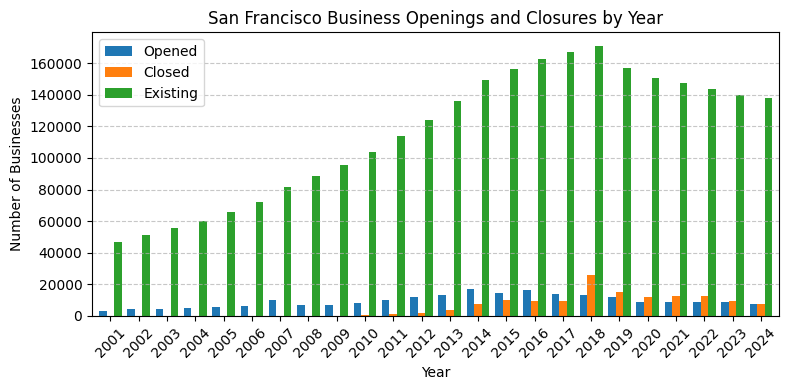

In [121]:
# data about opened, closed and existing business over years
%matplotlib inline

colors = [
    '#1f77b4',  # Blue
    '#ff7f0e',  # Orange
    '#2ca02c',  # Green
    '#d62728',  # Red
    '#9467bd',  # Purple
    '#8c564b',  # Brown
    '#e377c2',  # Pink
    '#7f7f7f',  # Gray
    '#bcbd22',  # Olive
    '#17becf'   # Teal
]

existing = count_existing(df_sf, years)
existing['Year'] = existing['Year'].astype(int)
existing = existing.set_index('Year')['Count']
openings = df_sf['Start Year'].value_counts().sort_index()
openings = openings[(openings.index > 2000) & (openings.index < 2025)]
closures = df_sf['End Year'].dropna().astype('Int64').value_counts().sort_index()
closures = closures[(closures.index > 2000) & (closures.index < 2025)]
combined = pd.DataFrame({
    'Opened': openings,
    'Closed': closures,
    'Existing':existing
    
}).fillna(0)


    
combined.plot(kind='bar', figsize=(8,4), width=0.8, color=colors)
plt.title('San Francisco Business Openings and Closures by Year')
plt.xlabel('Year')
plt.ylabel('Number of Businesses')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

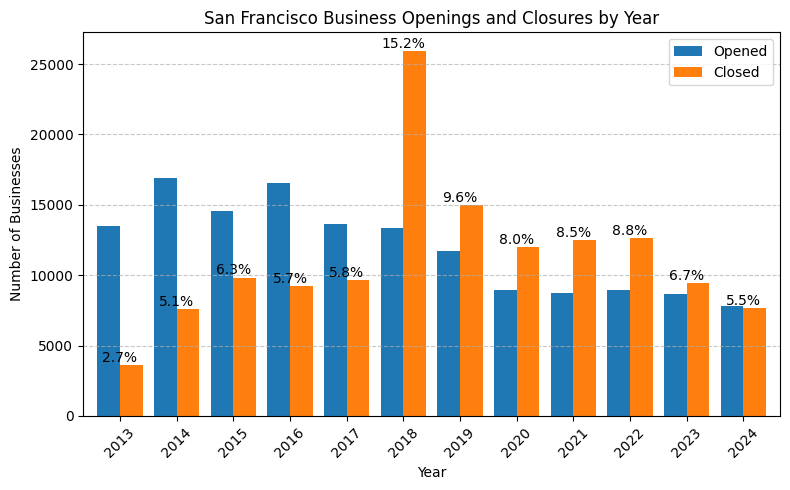

In [113]:
colors_2 = [
    '#1f77b4',  # Blue
    '#ff7f0e'  # Orange
   
]
# Calculate openings and closures an % of closing 
openings = df_sf['Start Year'].value_counts().sort_index()
openings = openings[(openings.index > 2012) & (openings.index < 2025)]

closures = df_sf['End Year'].dropna().astype('Int64').value_counts().sort_index()
closures = closures[(closures.index > 2012) & (closures.index < 2025)]

# Compute existing businesses per year (you must have this function/data)
existing = count_existing(df_sf, range(2013, 2025))
existing = existing.set_index('Year')['Count']

# Combine into one DataFrame
combined = pd.DataFrame({
    'Opened': openings,
    'Closed': closures,
    'Existing': existing
}).fillna(0)


combined['Closure %'] = (combined['Closed'] / combined['Existing']) * 100

# Plot bars
ax1 = combined[['Opened', 'Closed']].plot(kind='bar', figsize=(8, 5), width=0.8, color=colors_2)


for i, year in enumerate(combined.index):
    ax1.text(i, combined['Closed'][year] + 5, f"{combined['Closure %'][year]:.1f}%", 
             ha='center', va='bottom', fontsize=10, color='black')

# Final touches
plt.title('San Francisco Business Openings and Closures by Year')
plt.xlabel('Year')
plt.ylabel('Number of Businesses')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [148]:
# map of districts with the based of number of closures over chosen years
import folium
import pandas as pd
import json
import plotly.graph_objects as go
import plotly.express as px
from streamlit_folium import st_folium

df_201824= df_sf[df_sf['End Year'].between(2013, 2024)]
df_201824g = df_201824['District'].value_counts().astype(float).reset_index()
df_201824g.columns = ["District", "Count"]

print(df_201824g)
# Coordinates for Hyde Street in the Tenderloin, San Francisco
latitude = 37.787994
longitude = -122.407437
SF_COORDINATES = [latitude, longitude]
# Create a map
map1 = folium.Map(location=SF_COORDINATES, zoom_start=14)
folium.Choropleth(
    geo_data= r'C:\Users\wirgi\Desktop\Data visualization\san-francisco.geojson',  # GeoJSON file path
    name="2013-2024",
     data=df_201824g,  # Your incident data
   columns=["District", "Count"],
    key_on="feature.properties.DISTRICT",  # Make sure this key matches the field in GeoJSON
    fill_color="OrRd",
    fill_opacity=0.7,
    line_opacity=0.2,
      nan_fill_color='white',   # replaces black
    nan_fill_opacity=0.4,     # optional
    #scope="dk",
    legend_name="Number of closed companies in years 2018-2024"
).add_to(map1)
# markes for few companies which closed down or were affected by vandalism
df_markers = pd.DataFrame(
    {
    'Company': ['Forever 21', 'Toys "R" Us', 'GNC', 'Pier 1 Imports', 'The Walking Company', 'Neiman Marcus', 'Bebe', 'Banana Republic', 'Jamba Juice', 'The Cheesecake Factory', 
                'Circuit City', 'Borders', 'Sears', 'Panda Express', 'Lush', 'Lululemon', 'H&M', 'Macys', 'T-Mobile', 'The Gap', 
                'Urban Outfitters', 'Lands End', 'Madewell', 'Coach', 'Crocs', 'Williams-Sonoma', 'Cost Plus World Market', 'Old Navy', 'Saks Fifth Avenue', 'Abercrombie & Fitch',
                'Disney Store', 'Victorias Secret', 'Sur La Table', 'Chase Bank', 'Taco Bell', 'Pizza Hut', 'J.C. Penney', 'Ralph Lauren', 'Kiehl s', 'Lush Cosmetics', 'Kroger',
                'Burlington Coat Factory', 'Wells Fargo', 'American Eagle', 'Express', 'Zara', 'Target', 'GAP Outlet', 'Verizon Wireless', 'Safeway'],
    'Latitude': [37.7840, 37.7850, 37.7861, 37.7845, 37.7842, 37.7865, 37.7853, 37.7848, 37.7859, 37.7863,
                 37.7847, 37.7854, 37.7872, 37.7830, 37.7856, 37.7860, 37.7851, 37.7855, 37.7867, 37.7844,
                 37.7875, 37.7837, 37.7862, 37.7843, 37.7846, 37.7857, 37.7849, 37.7841, 37.7839, 37.7858,
                 37.7874, 37.7845, 37.7853, 37.7864, 37.7838, 37.7840, 37.7866, 37.7870, 37.7842, 37.7832,
                 37.7871, 37.7852, 37.7833, 37.7850, 37.7844, 37.7836, 37.7856, 37.7865, 37.7863, 37.7868],
    'Longitude': [-122.4078, -122.4067, -122.4062, -122.4073, -122.4068, -122.4060, -122.4071, -122.4065, -122.4060, -122.4067,
                  -122.4072, -122.4060, -122.4055, -122.4074, -122.4063, -122.4069, -122.4058, -122.4070, -122.4064, -122.4076,
                  -122.4075, -122.4072, -122.4064, -122.4073, -122.4069, -122.4061, -122.4078, -122.4065, -122.4071, -122.4062,
                  -122.4073, -122.4068, -122.4072, -122.4070, -122.4071, -122.4060, -122.4064, -122.4067, -122.4076, -122.4069,
                  -122.4073, -122.4074, -122.4062, -122.4075, -122.4068, -122.4070, -122.4073, -122.4064, -122.4077, -122.4071],
    'Status': ['Closed in 2021', 'Closed in 2020', 'Closed in 2019', 'Closed in 2021', 'Closed in 2019', 'Closed in 2022', 'Closed in 2020', 'Closed in 2022', 'Closed in 2021', 'Closed in 2020',
               'Closed in 2021', 'Closed in 2020', 'Closed in 2022', 'Closed in 2021', 'Closed in 2019', 'Closed in 2022', 'Closed in 2021', 'Closed in 2020', 'Closed in 2023', 'Closed in 2022',
               'Closed in 2021', 'Closed in 2023', 'Closed in 2021', 'Closed in 2022', 'Closed in 2020', 'Closed in 2021', 'Closed in 2023', 'Closed in 2020', 'Closed in 2021', 'Closed in 2021',
               'Closed in 2020', 'Closed in 2022', 'Closed in 2021', 'Closed in 2021', 'Closed in 2020', 'Closed in 2022', 'Closed in 2021', 'Closed in 2020', 'Closed in 2023', 'Closed in 2021',
               'Closed in 2022', 'Closed in 2020', 'Closed in 2021', 'Closed in 2020', 'Closed in 2021', 'Closed in 2023', 'Closed in 2022', 'Closed in 2021', 'Closed in 2023', 'Closed in 2020']
}

)

for idx, row in df_markers.iterrows():
    marker = folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"<b>{row['Company']}</b><br>Status: {row['Status']}",
        tooltip=f"{row['Company']} - {row['Status']}"
    )
    marker.add_to(map1)
    marker.tooltip = folium.Tooltip(f"{row['Company']} - {row['Status']}", permanent=True)

map1
map1.save(r"C:\Users\wirgi\Github\DataWorld2025.github.io\assets\mapBusi.html")

     District    Count
0    SOUTHERN  25814.0
1     CENTRAL  17296.0
2    NORTHERN  17091.0
3     MISSION  15194.0
4   INGLESIDE  14173.0
5     TARAVAL  11771.0
6     BAYVIEW  10498.0
7    RICHMOND  10393.0
8        PARK   7715.0
9  TENDERLOIN   5201.0


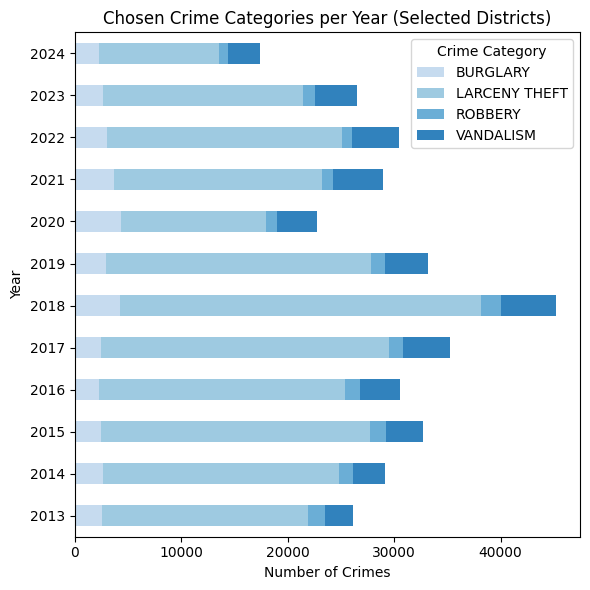

In [128]:
# Bar chart over years for top closures districts by chosen focus crimes

blue_colors = [
    '#c6dbef',  # Light Blue
    '#9ecae1',  # Sky Blue
    '#6baed6',  # Medium Blue
    '#3182bd',  # Strong Blue
    '#08519c'   # Deep Blue
]
Top_dist = {'CENTRAL', 'NORTHERN', 'SOUTHERN'}
focuscrimes = {'ROBBERY', 'BURGLARY', 'LARCENY THEFT', 'VANDALISM'}


dfc_dist = dfc[(dfc['PdDistrict'].isin(Top_dist))&(dfc['Year'].between(2013, 2024))]
dfc_focus = dfc_dist[dfc_dist['Category'].isin(focuscrimes)]

# Group by year and category, then count
grouped = dfc_focus.groupby(['Year', 'Category']).size().unstack(fill_value=0)


grouped.plot(kind='barh', stacked=True, figsize=(6,6), color=blue_colors)

plt.title('Chosen Crime Categories per Year (Selected Districts)')
plt.xlabel('Number of Crimes')
plt.ylabel('Year')
plt.legend(title='Crime Category')
plt.tight_layout()
plt.show()

**Discussion. Think critically about your creation**
What went well?
I think the area of analysis is very good and interesting and maybe appealing for the random reader.

What is still missing? What could be improved?, Why?

I would play more with different visualisations which can prove correlation between crime and business closures better than what I have now. I think my visuals are bit too simple.
